In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

## 1. DataSet Aleatoire

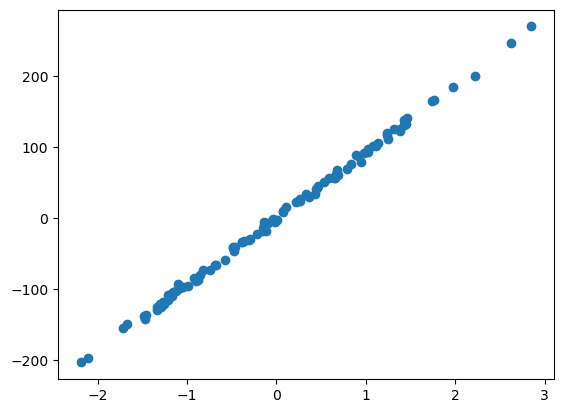

In [2]:
x, y = make_regression(n_samples = 100, n_features = 1, noise = 3)
plt.scatter(x, y)

In [3]:
print(x.shape)
print(x)
y = y.reshape(y.shape[0], 1)
print(y.shape)
print(y)
##print(x,"\n\n", y)

(100, 1)
[[-0.3812327 ]
 [-0.29607538]
 [ 0.3339616 ]
 [ 0.00755952]
 [-1.46148199]
 [-0.15355228]
 [-1.09751976]
 [ 1.9774144 ]
 [-0.13305448]
 [ 0.45359875]
 [-0.36152488]
 [ 0.4641341 ]
 [ 0.7847748 ]
 [-0.37895139]
 [ 0.26296208]
 [ 0.1121201 ]
 [ 0.91436726]
 [-0.45855479]
 [-0.87816187]
 [-1.47418368]
 [ 0.53228581]
 [ 0.6867528 ]
 [ 0.26910437]
 [-1.47882469]
 [ 0.5851468 ]
 [ 0.98043323]
 [-0.85004409]
 [ 2.85248318]
 [-1.25940285]
 [ 1.08251867]
 [-0.15248293]
 [-1.15905754]
 [ 1.01959189]
 [-0.91784253]
 [-1.12392215]
 [-0.67991719]
 [-0.98845885]
 [ 0.8309676 ]
 [-0.89804207]
 [ 0.44037457]
 [ 1.23307977]
 [ 0.07731291]
 [-1.17842539]
 [-1.66813766]
 [ 1.31470654]
 [ 0.68185972]
 [ 1.23561442]
 [ 1.13689724]
 [-0.1329518 ]
 [ 1.24490528]
 [-1.71527537]
 [-0.73696479]
 [-0.48230577]
 [ 0.65488853]
 [-0.03455967]
 [-1.20677936]
 [ 1.44746285]
 [ 0.21460519]
 [-1.26416538]
 [ 0.36898688]
 [ 0.07412447]
 [ 2.62600194]
 [ 1.74336773]
 [-2.19044405]
 [-0.82155739]
 [-0.48273405]
 

In [4]:
#matrice X
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)

(100, 2)


In [5]:
theta = np.random.randn(2, 1)
theta.shape

(2, 1)

## Model

In [6]:
def model(X, theta):
    return (X.dot(theta))

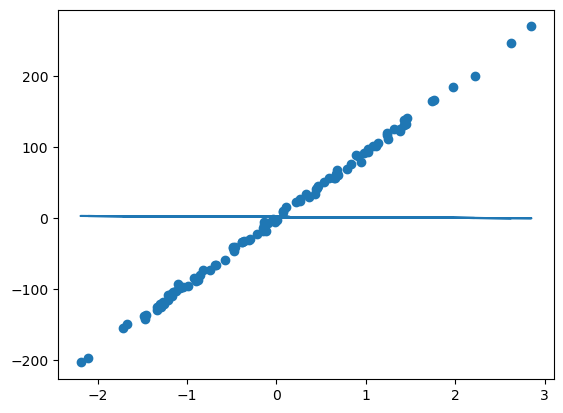

In [7]:
plt.scatter(x, y)
plt.plot(x, model(X, theta))

## Cost Function

In [8]:
def cost_func(X, y, theta):
    m = len(y)
    n = (2* m) * np.sum(np.power(model(X, theta) - y, 2))
    print(n)
    return 1/n

In [9]:
cost_func(X, y, theta)

206311778.05002326


4.847033016978486e-09

## Gradient Descente du Gradiant


In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_ite):
    for i in range(0, n_ite):
        theta = theta - learning_rate * grad(X, y, theta)
        print(theta)
    return theta


## Machine_learning

In [12]:
theta_final = gradient_descent(X, y, theta, learning_rate= 0.01, n_ite = 1000)


[[0.45318396]
 [1.52234986]]
[[1.53962797]
 [1.51626263]]
[[2.61332584]
 [1.51011037]]
[[3.67442713]
 [1.5038952 ]]
[[4.72307963]
 [1.49761921]]
[[5.7594294 ]
 [1.49128446]]
[[6.7836208 ]
 [1.48489296]]
[[7.79579648]
 [1.47844668]]
[[8.79609742]
 [1.47194756]]
[[9.78466295]
 [1.46539752]]
[[10.76163077]
 [ 1.45879841]]
[[11.72713695]
 [ 1.45215207]]
[[12.68131598]
 [ 1.44546031]]
[[13.62430075]
 [ 1.43872488]]
[[14.5562226 ]
 [ 1.43194754]]
[[15.47721135]
 [ 1.42512996]]
[[16.38739527]
 [ 1.41827383]]
[[17.28690113]
 [ 1.41138079]]
[[18.17585422]
 [ 1.40445243]]
[[19.05437836]
 [ 1.39749034]]
[[19.9225959 ]
 [ 1.39049606]]
[[20.78062778]
 [ 1.3834711 ]]
[[21.6285935 ]
 [ 1.37641696]]
[[22.46661117]
 [ 1.3693351 ]]
[[23.2947975 ]
 [ 1.36222693]]
[[24.11326786]
 [ 1.35509388]]
[[24.92213624]
 [ 1.3479373 ]]
[[25.72151528]
 [ 1.34075855]]
[[26.51151635]
 [ 1.33355895]]
[[27.29224945]
 [ 1.32633979]]
[[28.06382334]
 [ 1.31910235]]
[[28.82634548]
 [ 1.31184786]]
[[29.57992207]
 [ 1.30457756

In [13]:
theta_final

array([[93.06928935],
       [-0.15938889]])

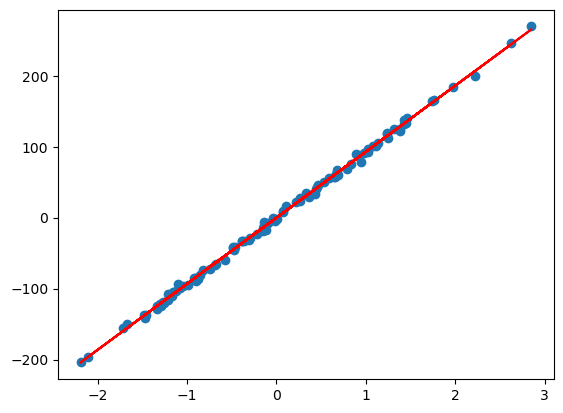

In [14]:
prediction = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, prediction, c = 'r')

## Coefficent determination

In [15]:
def coef_det(x, pred):
    u = np.power((y - pred), 2).sum()
    v = np.power((y - y.mean()), 2).sum()
    return 1 - u/v

In [16]:
coef_determination = coef_det(y, prediction)
print(coef_determination)

0.9988238037648628


## Import data for reg_lin

In [17]:
import pandas as pd

In [18]:
data = pd.read_csv('data.csv')

In [19]:
data.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


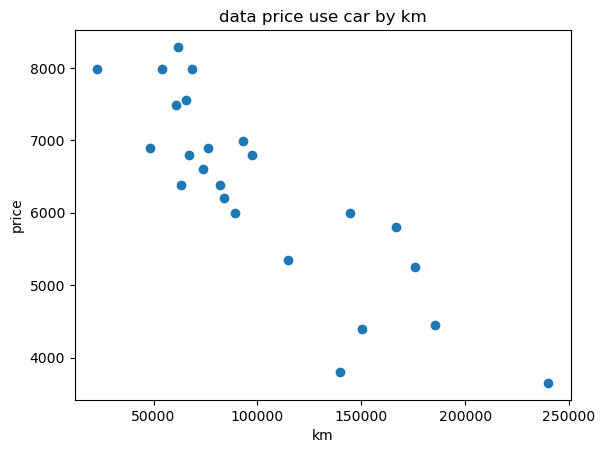

In [20]:
plt.scatter(data['km'], data['price'])
plt.title("data price use car by km")
plt.ylabel("price")
plt.xlabel("km")
plt.show()

[[-0.95826302]
 [ 0.58274092]]
24
[[1.29188948e+06]
 [1.09006710e+01]]
[[-1.66309393e+12]
 [-1.30566310e+07]]
[[2.14095831e+18]
 [1.68082536e+13]]
[[-2.75612964e+24]
 [-2.16378459e+19]]
[[3.54806097e+30]
 [2.78551471e+25]]
[[-4.56754154e+36]
 [-3.58588938e+31]]
[[5.87995412e+42]
 [4.61623937e+37]]
[[-7.56946821e+48]
 [-5.94264452e+43]]
[[9.74443811e+54]
 [7.65017173e+49]]
[[-1.25443520e+61]
 [-9.84833053e+55]]
[[1.61487780e+67]
 [1.26780964e+62]]
[[-2.07888802e+73]
 [-1.63209517e+68]]
[[2.67622442e+79]
 [2.10105254e+74]]
[[-3.44519621e+85]
 [-2.70475756e+80]]
[[4.43512019e+91]
 [3.48192791e+86]]
[[-5.70948354e+97]
 [-4.48240617e+92]]
[[7.35001554e+103]
 [5.77035642e+098]]
[[-9.46192909e+109]
 [-7.42837931e+104]]
[[1.21806684e+116]
 [9.56280948e+110]]
[[-1.56805955e+122]
 [-1.23105352e+117]]
[[2.01861727e+128]
 [1.58477776e+123]]
[[-2.59863580e+134]
 [-2.04013919e+129]]
[[3.34531370e+140]
 [2.62634171e+135]]
[[-4.30653797e+146]
 [-3.38098048e+141]]
[[5.54395521e+152]
 [4.35245305e+147]]

/var/folders/h1/1sdrt1z17jgc7_mc7t90p5lr0000gq/T/ipykernel_93877/2138638968.py:3: RuntimeWarning: invalid value encountered in subtract
  theta = theta - learning_rate * grad(X, y, theta)


[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [nan]]
[[nan]
 [n

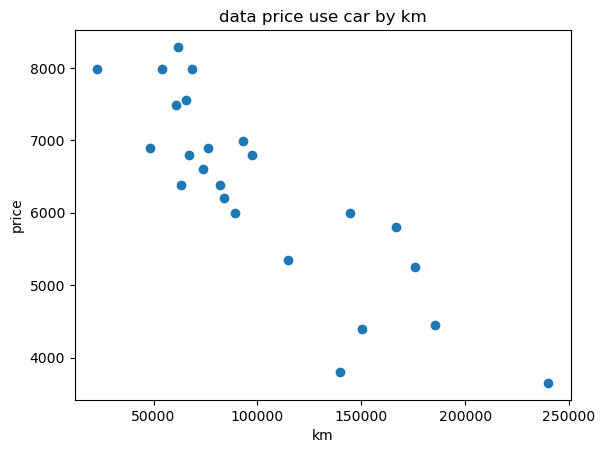

In [21]:
theta = np.random.randn(2, 1)
print(theta)
x = data['km']
y = data['price']

x = x.values.reshape(x.shape[0], 1)
y = y.values.reshape(y.shape[0], 1)




X = np.hstack((x, np.ones(x.shape)))
print(len(y))
#print(X)
theta_final = gradient_descent(X, y, theta, learning_rate= 0.0001, n_ite = 10000)

print(theta_final)

prediction = model(X, theta_final)
print(prediction)
plt.scatter(data['km'], data['price'])
plt.title("data price use car by km")
plt.ylabel("price")
plt.xlabel("km")
plt.plot(x, prediction , c = 'r')